In [1]:
import numpy as np 
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import calendar

plt.style.use('seaborn')

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

C:\Users\Jesse\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [2]:
data_path = 'C:/Users/Jesse/Desktop/midterm_data/data/'
flights_df = pd.read_csv(data_path + 'flights.csv')

In [3]:
flights_df['fl_date'] = pd.to_datetime(flights_df['fl_date'], format='%Y-%m-%d')

In [4]:
flights_df['month'] = flights_df['fl_date'].apply(lambda x: x.month)

In [5]:
flights = flights_df.loc[(flights_df['arr_time'].notna()) &
                         (flights_df['dep_time'].notna())]

flights.shape

(15652405, 43)

In [6]:
def convert_time_to_string(x):
    if np.isnan(x):
        return '00:00'
    
    if x == 2400:
        return '23:59'
    
    string = str(int(x))
    
    if len(string) < 4:
        for _ in range(4-len(string)):
            string = '0' + string
    
    return string[:2] + ':' + string[2:]

In [7]:
# Convert dep_time and arr_time to datetimes

flights['dep_time'] = flights['dep_time'].apply(lambda x: convert_time_to_string(x))
flights['dep_time'] = pd.to_datetime(flights['dep_time'], format ='%H:%M')
flights['dep_hour'] = flights['dep_time'].dt.hour

flights['arr_time'] = flights['arr_time'].apply(lambda x: convert_time_to_string(x))
flights['arr_time'] = pd.to_datetime(flights['arr_time'], format ='%H:%M')
flights['arr_hour'] = flights['arr_time'].dt.hour



In [8]:
# Flights departure delay rate, flights arrival delay rate during time of day

In [9]:
# Count for all flights
x = pd.DataFrame(flights.groupby('dep_hour')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)
x

,dep_hour,total_flights
0,0,64675
1,1,25347
2,2,8012
3,3,4639
4,4,42326
5,5,619844
6,6,991056
7,7,948737
8,8,976931
9,9,913845


In [10]:
y=pd.DataFrame(flights.loc[flights['dep_delay'] > 20].groupby('dep_hour')['fl_date'].count().reset_index()).rename({'fl_date': 'flights_delayed20'}, axis=1)

In [15]:
x['fraction_delayed_flights'] = y['flights_delayed20']/x['total_flights']

In [16]:
r = pd.DataFrame(flights.groupby('arr_hour')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)
y = pd.DataFrame(flights.loc[flights['arr_delay'] > 20].groupby('arr_hour')['fl_date'].count().reset_index()).rename({'fl_date': 'flights_delayed20'}, axis=1)
r['fraction_delayed_flights'] = y['flights_delayed20']/r['total_flights']

r

,arr_hour,total_flights,fraction_delayed_flights
0,0,306060,0.458090
1,1,100185,0.709328
2,2,33388,0.804541
3,3,13257,0.664027
4,4,40254,0.091370
5,5,108444,0.058205
6,6,292282,0.043882
7,7,587004,0.039456
8,8,779569,0.050901
9,9,890939,0.073258


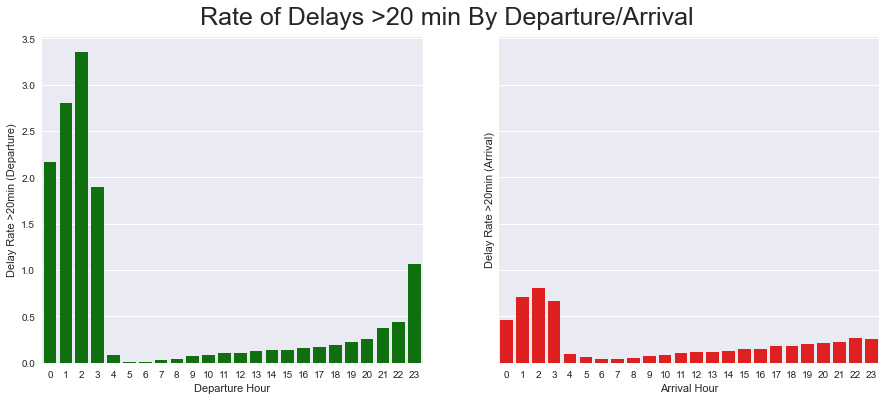

In [22]:
f, axes = plt.subplots(1, 2, figsize=(15,6), sharey=True)
                       
ax1 = sns.barplot(x='dep_hour', y='fraction_delayed_flights', data=x, ax=axes[0], color='green')                      
ax1.set(xlabel='Departure Hour', ylabel='Delay Rate >20min (Departure)');  


ax2 = sns.barplot(x='arr_hour', y='fraction_delayed_flights', data=r, color='red')
ax2.set( xlabel='Arrival Hour', ylabel='Delay Rate >20min (Arrival)');

plt.suptitle('Rate of Delays >20 min By Departure/Arrival', fontsize=25,y=0.95);

#### Most common delay

In [23]:
delays = flights[['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']]
delays

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,NaN,NaN,NaN,NaN,NaN
1,39.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN
3,18.0,0.0,0.0,0.0,0.0
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
15927480,NaN,NaN,NaN,NaN,NaN
15927481,9.0,0.0,15.0,0.0,0.0
15927482,NaN,NaN,NaN,NaN,NaN
15927483,NaN,NaN,NaN,NaN,NaN


In [24]:
carrier_delay_frac = delays.loc[delays['carrier_delay'] > 0].shape[0]/delays.shape[0]
weather_delay_frac = delays.loc[delays['weather_delay'] > 0].shape[0]/delays.shape[0]
nas_delay_frac = delays.loc[delays['nas_delay'] > 0].shape[0]/delays.shape[0]
security_delay_frac = delays.loc[delays['security_delay'] > 0].shape[0]/delays.shape[0]
late_aircraft_delay_frac = delays.loc[delays['late_aircraft_delay'] > 0].shape[0]/delays.shape[0]

[Text(0, 0.5, 'Rate'), Text(0.5, 1.0, 'Most Frequent Types of Delays')]

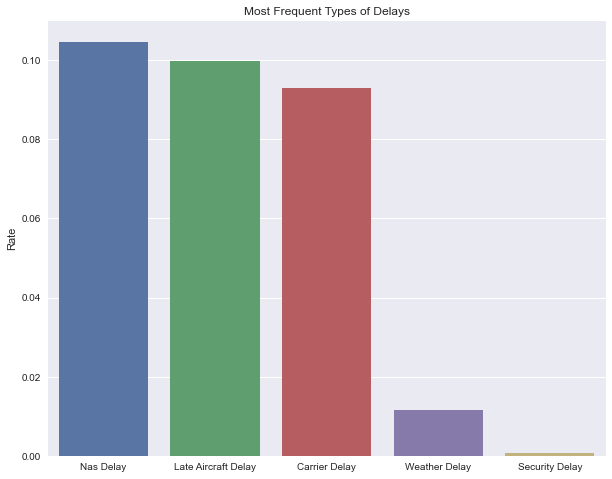

In [25]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x=['Nas Delay','Late Aircraft Delay', 'Carrier Delay', 'Weather Delay', 'Security Delay'], y=[nas_delay_frac, late_aircraft_delay_frac, carrier_delay_frac, weather_delay_frac, security_delay_frac])
ax.set(title='Most Frequent Types of Delays', ylabel='Rate', )

In [55]:
delays.head(2)

,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,NaN,NaN,NaN,NaN,NaN
1,39.0,0.0,0.0,0.0,0.0


In [59]:
#### Avg length of each delay
carrier_avg_delay = delays['carrier_delay'].mean()
weather_avg_delay = delays['weather_delay'].mean()
nas_avg_delay = delays['nas_delay'].mean()
security_avg_delay = delays['security_delay'].mean()
late_aircraft_avg_delay = delays['late_aircraft_delay'].mean()

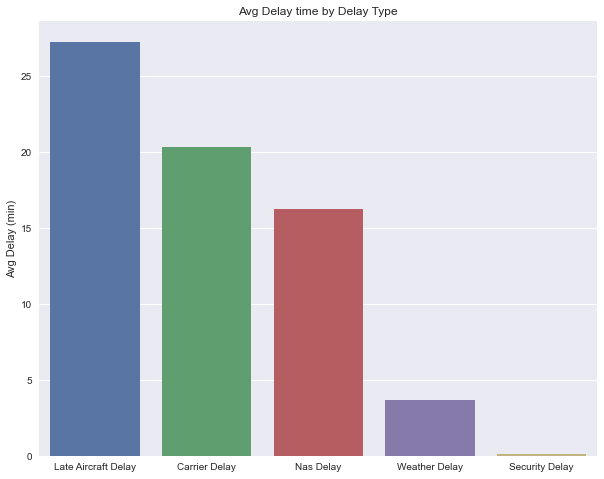

In [64]:
fig, ax = plt.subplots(figsize=(10,8))

ax = sns.barplot(x=['Late Aircraft Delay', 'Carrier Delay', 'Nas Delay', 'Weather Delay', 'Security Delay', ], y=[late_aircraft_avg_delay, carrier_avg_delay, nas_avg_delay, weather_avg_delay, security_avg_delay])
ax.set(title='Avg Delay time by Delay Type', ylabel='Avg Delay (min)');

### Cancellation 

#### Cancel count vs months

In [28]:
cancel_codes = {'A':'Airline/Carrier', 'B':'Weather', 'C':'National Air System', 'D':'Security', 'X': 'Other'}

In [29]:
cancelled_flights = flights_df.loc[flights_df['cancelled'] == 1]

In [30]:
df = pd.DataFrame(cancelled_flights.groupby(['month','cancellation_code']).count()['fl_date'].reset_index()).rename({'fl_date': 'count'}, axis=1)
df['cancellation_code'].replace(cancel_codes, inplace=True)
df['month'] = df['month'].apply(lambda x: calendar.month_name[x])
df.head()

,month,cancellation_code,count
0,January,Airline/Carrier,2033
1,January,Weather,14202
2,January,National Air System,3323
3,January,Security,1
4,February,Airline/Carrier,5691


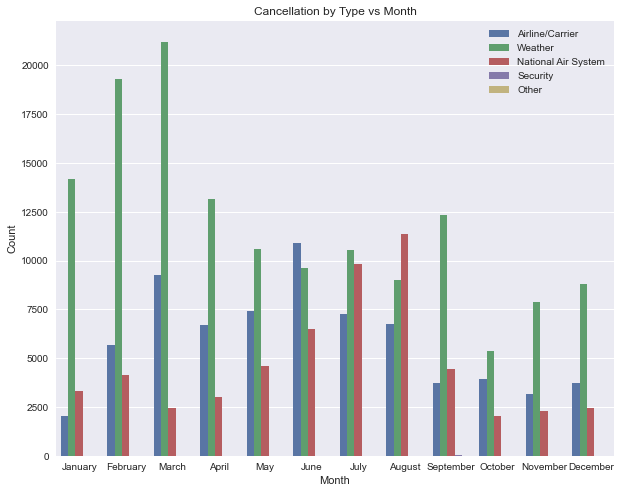

In [30]:
fig, ax = plt.subplots(figsize=(10,8))

ax= sns.barplot(x='month', y='count', hue='cancellation_code', data=df)
plt.legend(loc='upper right')

ax.set(title = 'Cancellation by Type vs Month', xlabel='Month', ylabel='Count');

In [36]:
pd.DataFrame(df.groupby('month')['count'].sum().reset_index()).sort_values('count', ascending=False)

,month,count
7,March,32964
3,February,29161
5,July,27599
1,August,27173
6,June,27025
0,April,22895
8,May,22640
11,September,20548
4,January,19559
2,December,14979


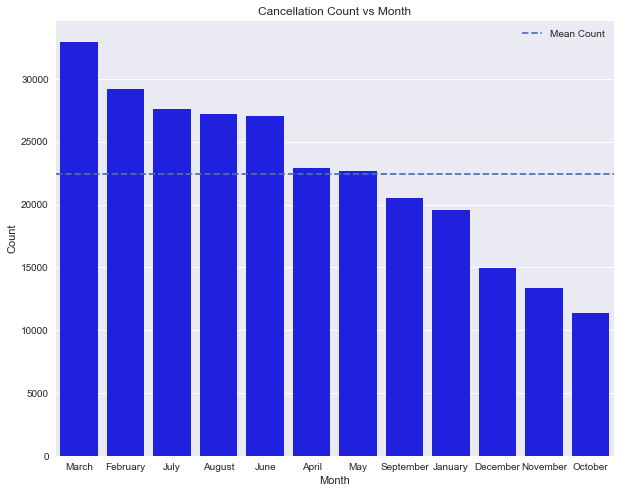

In [36]:
fig, ax = plt.subplots(figsize=(10,8))

ax2 = sns.barplot(x='month', y='count', data=pd.DataFrame(df.groupby('month')['count'].sum().reset_index()).sort_values('count', ascending=False), color='blue')
ax.set(title = 'Cancellation Count vs Month', xlabel='Month', ylabel='Count');

mean_count = pd.DataFrame(df.groupby('month')['count'].sum().reset_index()).sort_values('count', ascending=False)['count'].mean()
ax2.axhline(mean_count, ls='--', label='Mean Count')
plt.legend();

In [42]:
y

,month,total_flights
0,1,19559
1,2,29161
2,3,32964
3,4,22895
4,5,22640
5,6,27025
6,7,27599
7,8,27173
8,9,20548
9,10,11335


In [43]:
pd.merge(left=x, right=y, on='month')

,month,total_flights_x,total_flights_y
0,1,1239868,19559
1,2,1149857,29161
2,3,1354995,32964
3,4,1317246,22895
4,5,1365999,22640
5,6,1376471,27025
6,7,1419558,27599
7,8,1418808,27173
8,9,1298326,20548
9,10,1363034,11335


In [48]:
# total
x = pd.DataFrame(flights_df.groupby('month')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)

# Just canclled
y = pd.DataFrame(cancelled_flights.groupby('month')['fl_date'].count().reset_index()).rename({'fl_date': 'total_flights'}, axis=1)

df_fraction = pd.merge(left=x, right=y, on='month')
df_fraction

,month,total_flights_x,total_flights_y
0,1,1239868,19559
1,2,1149857,29161
2,3,1354995,32964
3,4,1317246,22895
4,5,1365999,22640
5,6,1376471,27025
6,7,1419558,27599
7,8,1418808,27173
8,9,1298326,20548
9,10,1363034,11335


In [50]:
df_fraction.dtypes

month                int64
total_flights_x      int64
total_flights_y      int64
cancelled_frac     float64
dtype: object

In [56]:
calendar.month_name[2]

'February'

In [62]:
df_fraction['cancelled_frac'] = df_fraction['total_flights_y']/df_fraction['total_flights_x']

# df_fraction['month'] = df_fraction.apply(lambda x: calendar.month_name[x])

# df_fraction['month'] = df['month'].apply(lambda x: calendar.month_name[x])
# df_fraction.rename({'cancelled_frac': 'Fraction Flights Cancelled'}, axis=1, inplace=True)

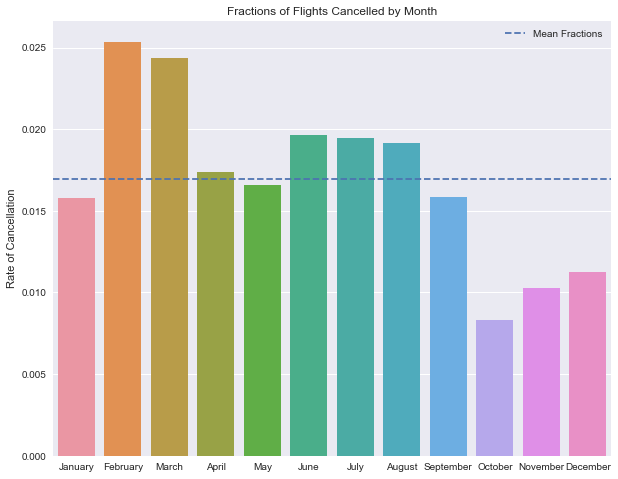

In [65]:
fig, ax = plt.subplots(figsize=(10,8))

ax1 = sns.barplot(x=[calendar.month_name[n] for n in df_fraction['month'].values], y='cancelled_frac', data=df_fraction)


ax1.set(Title='Fractions of Flights Cancelled by Month', ylabel='Rate of Cancellation')

mean_frac = df_fraction['cancelled_frac'].mean()
ax1.axhline(mean_frac, ls='--', label='Mean Fractions')
plt.legend();